<a href="https://colab.research.google.com/github/NatSama2/Curso-Alura-Latam/blob/main/challenge2-data-science-TelecomX/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd

In [2]:
ruta_archivo = '/content/TelecomX_Data.json'


In [3]:
df = pd.read_json(ruta_archivo)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#✅3: Conoce el conjunto de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df.describe(include='all')

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


## Expansión de columnas anidadas

In [6]:
# Normalizamos las columnas anidadas
customer_exp = pd.json_normalize(df['customer'])
phone_exp = pd.json_normalize(df['phone'])
internet_exp = pd.json_normalize(df['internet'])
account_exp = pd.json_normalize(df['account'])

In [7]:
# Unimos todo en un DataFrame final
df_final = pd.concat([df[['customerID', 'Churn']], customer_exp, phone_exp, internet_exp, account_exp], axis=1)

In [8]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
# Estadísticas generales del nuevo DataFrame
df_final.describe(include='all')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7256.000000
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,NaN
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,NaN
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000


## 🎯 Variables clave para el análisis de evasión (churn)
A partir de lo analizado, estas son algunas variables que parecen relevantes:
- `SeniorCitizen`, `Partner`, `Dependents`
- `PhoneService`, `MultipleLines`
- `InternetService`, `OnlineSecurity`, `TechSupport`, `StreamingTV`
- `Contract`, `PaperlessBilling`, `PaymentMethod`
- `MonthlyCharges`, `TotalCharges`, `tenure`

# ✅ 4: Comprobación de incoherencias en los datos

In [12]:
# Verificamos si hay valores nulos
df_final.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [13]:
# Verificamos si hay registros duplicados en el DataFrame
duplicados = df_final.duplicated().sum()
print(f"Registros duplicados: {duplicados}")

Registros duplicados: 0


In [14]:
# Valores únicos por columna categórica
# Recorremos las columnas tipo object para ver sus valores únicos
for col in df_final.select_dtypes(include='object').columns:
    print(f"\nValores únicos en '{col}':")
    print(df_final[col].unique())


Valores únicos en 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Valores únicos en 'Churn':
['No' 'Yes' '']

Valores únicos en 'gender':
['Female' 'Male']

Valores únicos en 'Partner':
['Yes' 'No']

Valores únicos en 'Dependents':
['Yes' 'No']

Valores únicos en 'PhoneService':
['Yes' 'No']

Valores únicos en 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores únicos en 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores únicos en 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores únicos en 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores únicos en 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores únicos en 'TechSupport':
['Yes' 'No' 'No internet service']

Valores únicos en 'StreamingTV':
['Yes' 'No' 'No internet service']

Valores únicos en 'StreamingMovies':
['No' 'Yes' 'No internet service']

Valores únicos en 'Contract':
['One year' 'Month-to-month' 'Two year']

Valores únicos en 'Pa

In [15]:
# Intentamos convertir Charges.Total a numérico, forzando errores como NaN
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [16]:
# Verificamos cuántos valores no numéricos fueron convertidos a NaN
print(f"Valores no numéricos en 'Charges.Total': {df_final['Charges.Total'].isnull().sum()}")

Valores no numéricos en 'Charges.Total': 11


In [17]:
df_final.describe(include='all')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7256.000000
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,NaN
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,NaN
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000


# ✅ 5: Manejo de inconsistencias

In [18]:
# Limpiar strings: quitar espacios y convertir a minúsculas en columnas tipo objeto
cols_obj = df_final.select_dtypes(include='object').columns
for col in cols_obj:
    df_final[col] = df_final[col].astype(str).str.strip().str.lower()

In [19]:
# Reemplazos para unificar respuestas inconsistentes en servicios
reemplazos = {
    'yes': 'yes',
    'no': 'no',
    'no phone service': 'no',
    'no internet service': 'no'
}

In [20]:
# Columnas con posibles valores inconsistentes
columnas_servicio = [
    'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
    'streamingtv', 'streamingmovies', 'multiplelines'
]

for col in columnas_servicio:
    if col in df_final.columns:
        df_final[col] = df_final[col].replace(reemplazos)

In [21]:
# Confirmar limpieza mostrando valores únicos después del reemplazo
for col in columnas_servicio:
    if col in df_final.columns:
        print(f"\nValores únicos en '{col}' después de limpiar:")
        print(df_final[col].unique())

In [22]:
# Reconversión por seguridad
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
df_final['Charges.Total']

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [23]:
# Verificamos valores nulos después de limpieza
print("\nValores nulos después de limpieza:")
print(df_final.isnull().sum())


Valores nulos después de limpieza:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64


# ✅ 6: Columna de cuentas diarias

In [24]:
# Calculamos la facturación diaria a partir del cargo mensual
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30
df_final['Cuentas_Diarias']

,Cuentas_Diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [25]:
# Verificamos la nueva columna
df_final[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [26]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


# ✅ 8: Análisis Descriptivo

In [27]:
# Calculamos estadísticas descriptivas básicas
descripcion_general = df_final.describe(include='all')
descripcion_general

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267.000000,7256.000000,7267.000000
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,2,4,NaN,NaN,NaN
top,9995-hotoh,no,male,NaN,no,no,NaN,yes,no,fiber optic,...,no,no,no,no,month-to-month,yes,electronic check,NaN,NaN,NaN
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3195,3582,2896,2870,4005,4311,2445,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,2280.634213,2.157337
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,2268.632997,1.004319
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,0.608333
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,400.225000,1.180833
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,1391.000000,2.343333
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,3785.300000,2.995833


In [28]:
# Mediana específica por columna numérica (opcional)
print("\nMediana de las columnas numéricas:")
print(df_final.median(numeric_only=True))


Mediana de las columnas numéricas:
SeniorCitizen         0.000000
tenure               29.000000
Charges.Monthly      70.300000
Charges.Total      1391.000000
Cuentas_Diarias       2.343333
dtype: float64


In [29]:
# Desviación estándar específica por columna numérica (opcional)
print("\nDesviación estándar:")
print(df_final.std(numeric_only=True))


Desviación estándar:
SeniorCitizen         0.369074
tenure               24.571773
Charges.Monthly      30.129572
Charges.Total      2268.632997
Cuentas_Diarias       1.004319
dtype: float64


#✅ 9: Distribución de evasión

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Ajustamos estilo
sns.set(style="whitegrid")

In [32]:
# Verificamos los valores únicos de la columna 'Churn'
print(df_final['Churn'].value_counts(dropna=False))

Churn
no     5174
yes    1869
        224
Name: count, dtype: int64


In [33]:
# Eliminamos registros con valores inválidos o nulos en 'Churn'
df_final = df_final[df_final['Churn'].isin(['yes', 'no'])]

<ipython-input-34-f2f6483f7859>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_churn_etiquetas, x='Churn', palette=['#a6cee3', '#fdbf6f'])


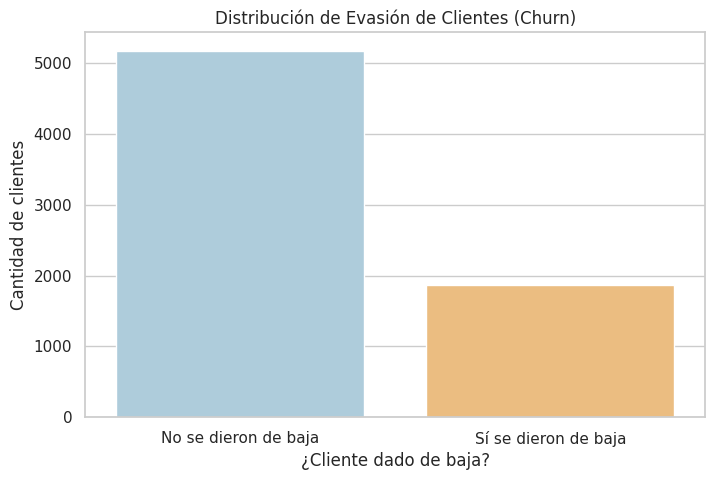

In [34]:
df_churn_etiquetas = df_final.copy()
df_churn_etiquetas['Churn'] = df_churn_etiquetas['Churn'].map({
    'no': 'No se dieron de baja',
    'yes': 'Sí se dieron de baja'
})

# 📊 Gráfico de barras: Distribución de evasión
plt.figure(figsize=(8,5))
sns.countplot(data=df_churn_etiquetas, x='Churn', palette=['#a6cee3', '#fdbf6f'])
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('¿Cliente dado de baja?')
plt.ylabel('Cantidad de clientes')
plt.show()

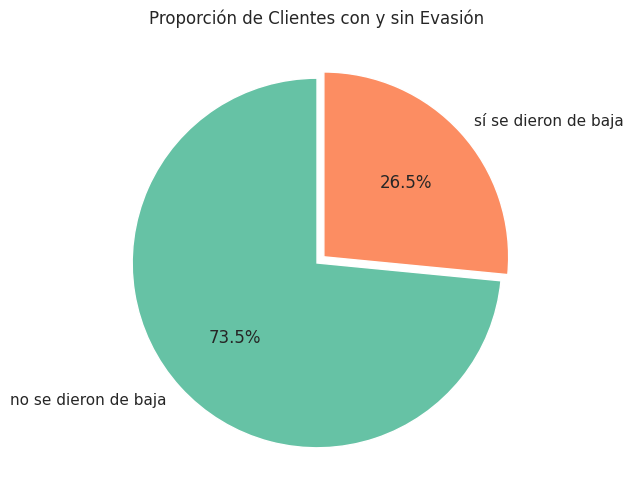

In [35]:
# 🥧 Gráfico de torta: Proporción de clientes con y sin evasión
plt.figure(figsize=(6,6))
df_final['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66c2a5', '#fc8d62'],
    labels=['no se dieron de baja', 'sí se dieron de baja '],
    explode=(0, 0.05)
)
plt.title('Proporción de Clientes con y sin Evasión')
plt.ylabel('')
plt.show()

# ✅ 10: Recuento de evasión por variables categóricas

In [36]:
# Lista de columnas categóricas a analizar
variables_categoricas = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

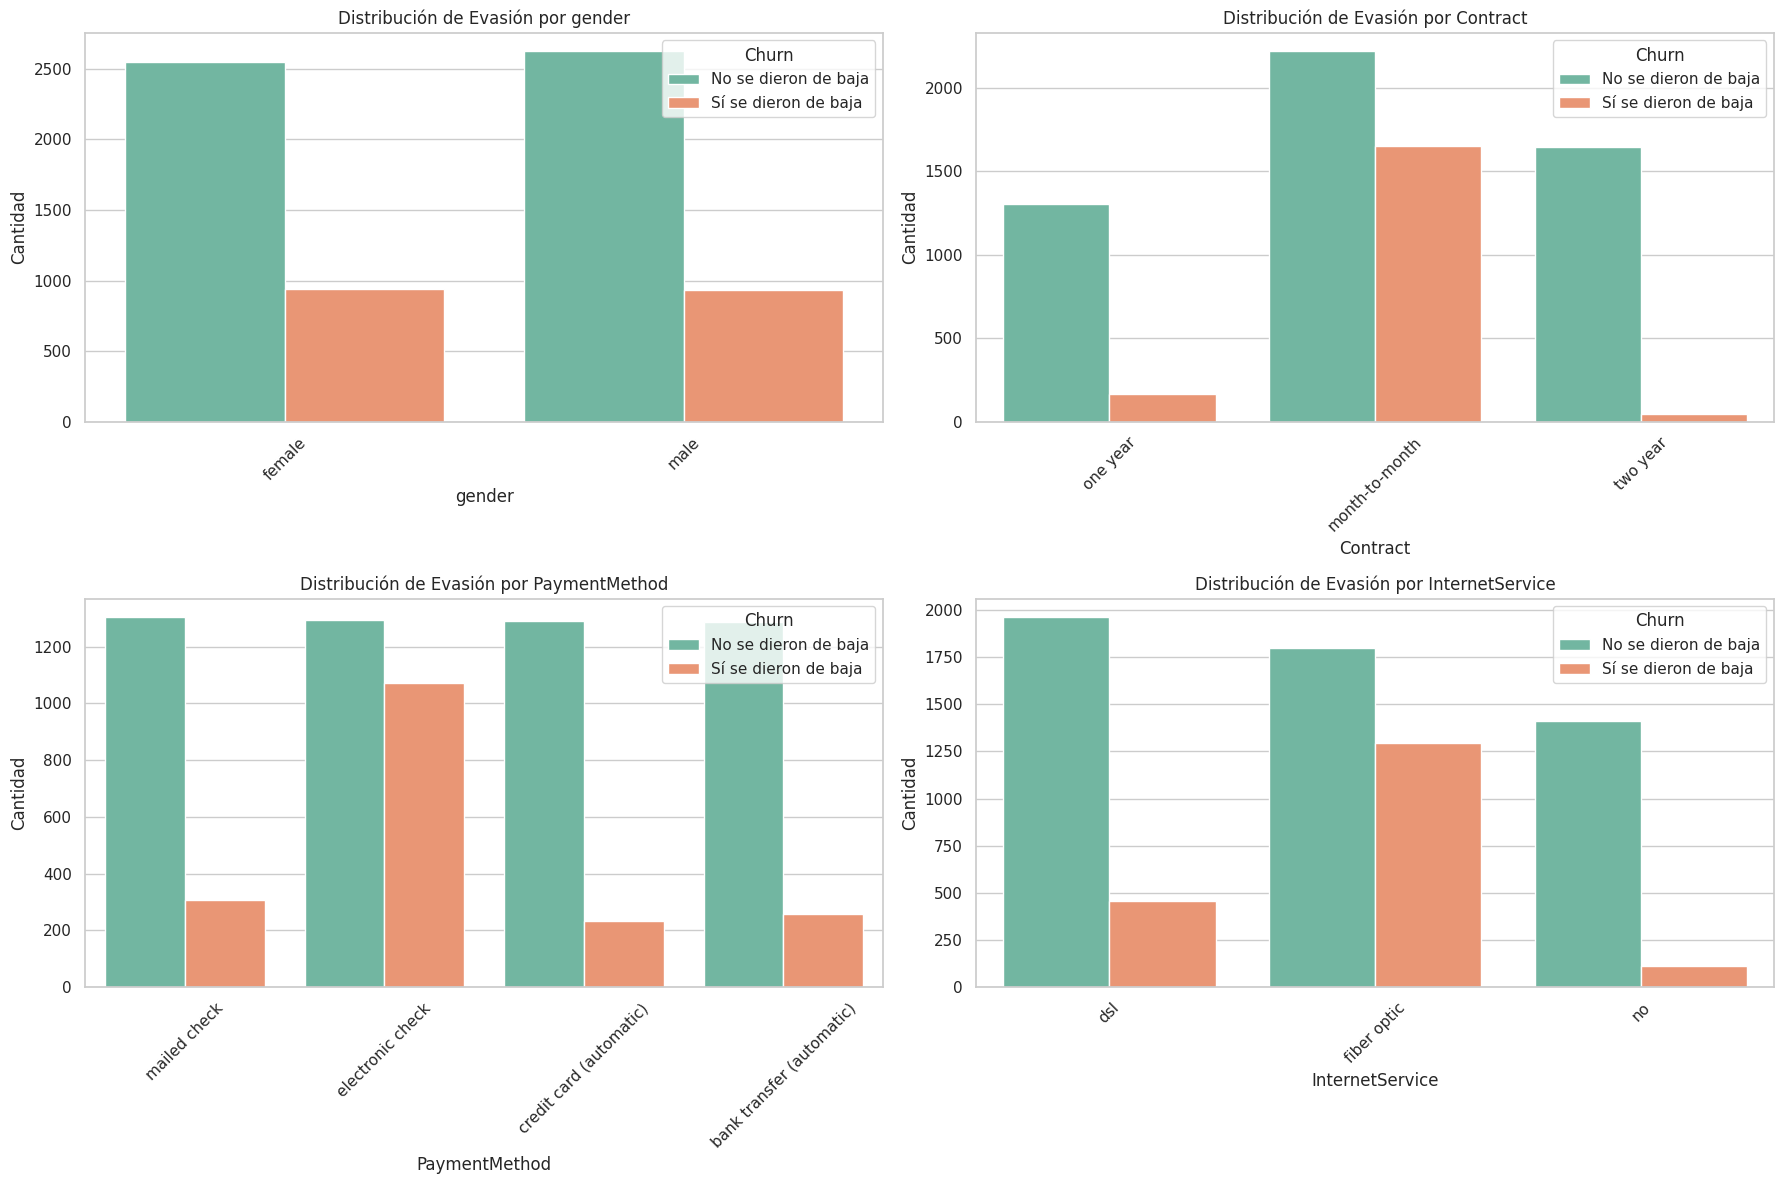

In [37]:
# Creamos una figura para múltiples subgráficos
plt.figure(figsize=(18, 12))

for i, col in enumerate(variables_categoricas, 1):
    plt.subplot(2, 2, i)

    df_plot = df_final.copy()
    df_plot['Churn'] = df_plot['Churn'].map({
        'no': 'No se dieron de baja',
        'yes': 'Sí se dieron de baja'
    })

    sns.countplot(data=df_plot, x=col, hue='Churn', palette=['#66c2a5', '#fc8d62'])
    plt.title(f'Distribución de Evasión por {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# ✅ 11: Conteo de evasión por variables numéricas

In [38]:
df_numerico = df_final.copy()
df_numerico['Churn'] = df_numerico['Churn'].map({
    'no': 'No se dieron de baja',
    'yes': 'Sí se dieron de baja'
})


In [39]:
variables_numericas = ['Charges.Total', 'tenure']

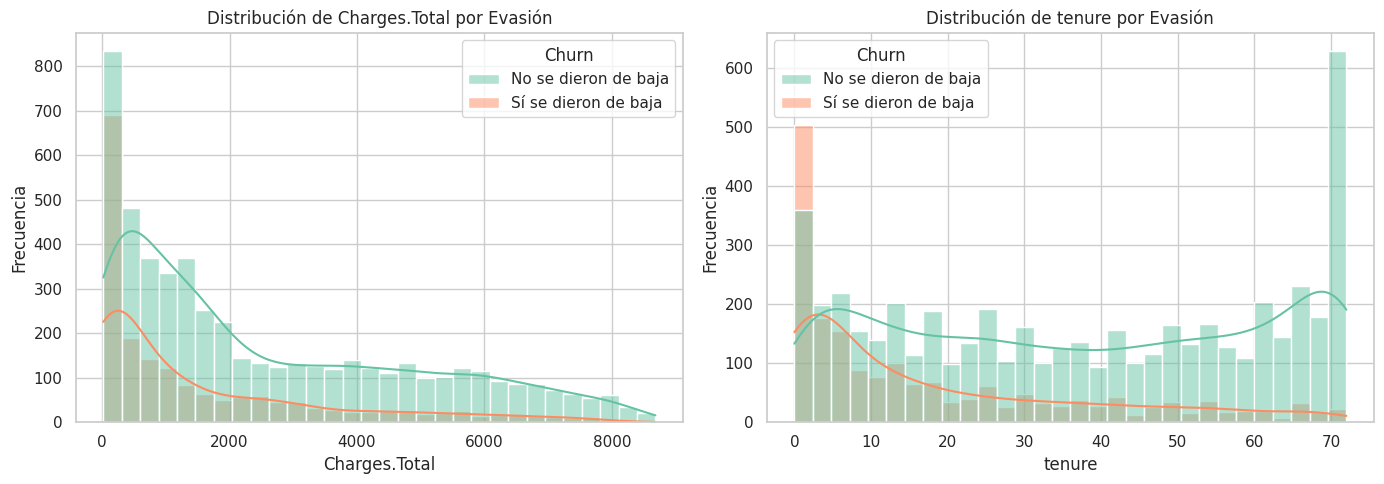

In [40]:
plt.figure(figsize=(14, 5))

for i, col in enumerate(variables_numericas, 1):
    plt.subplot(1, 2, i)
    sns.histplot(data=df_numerico, x=col, hue='Churn', kde=True, palette=['#66c2a5', '#fc8d62'], bins=30)
    plt.title(f'Distribución de {col} por Evasión')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#🔧 Transformación

#📊 Carga y análisis

#📄Informe final